### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

### Load the dataset

In [2]:
df = pd.read_csv(r'data/titanic_toy.csv')

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
df.isnull().mean() * 100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

### Train Test Split

In [6]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 3), (179, 3), (712,), (179,))

### Traditional way of imputing missing values using Arbitrary value

#### Impute the Age and Fare columns using arbitrary values

In [9]:
def arbitrary_imputer(col):
    X_train[col + '_99'] = X_train[col].fillna(99)
    X_train[col + '_minus1'] = X_train[col].fillna(-1)

In [10]:
arbitrary_imputer('Age')
arbitrary_imputer('Fare')

In [11]:
X_train.sample(5)

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
337,41.0,134.500,0,41.0,41.0,134.500,134.500
217,42.0,27.000,1,42.0,42.0,27.000,27.000
87,NaN,8.050,0,99.0,-1.0,8.050,8.050
463,48.0,13.000,0,48.0,48.0,13.000,13.000
393,23.0,113.275,1,23.0,23.0,113.275,113.275


In [12]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

Original Age variable variance:  210.2517072477438
Age Variance after 99 wala imputation:  932.9665366701436
Age Variance after -1 wala imputation:  315.99550362600644


In [13]:
print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 99 wala imputation: ', X_train['Fare_99'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Fare variable variance:  2761.031434948639
Fare Variance after 99 wala imputation:  2833.708690936757
Fare Variance after -1 wala imputation:  2675.2394049177087


* The Variance (spread of data) seems to be increased after the imputing the missing values using arbitrary values (99 and -1).

#### Checking distribution after imputing

In [14]:
def visualize(col):
    plt.figure(figsize=(10, 6))

    # KDE for original column (with NaNs automatically dropped)
    sns.kdeplot(X_train[col], label=col + '_Original', color='blue')

    # KDE for median-imputed version
    sns.kdeplot(X_train[col + '_99'], label=col + '_99', color='green')
 
    # KDE for mean-imputed version
    sns.kdeplot(X_train[col + '_minus1'], label=col + '_minus1', color='red')

    plt.title(f'Distribution Comparison for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

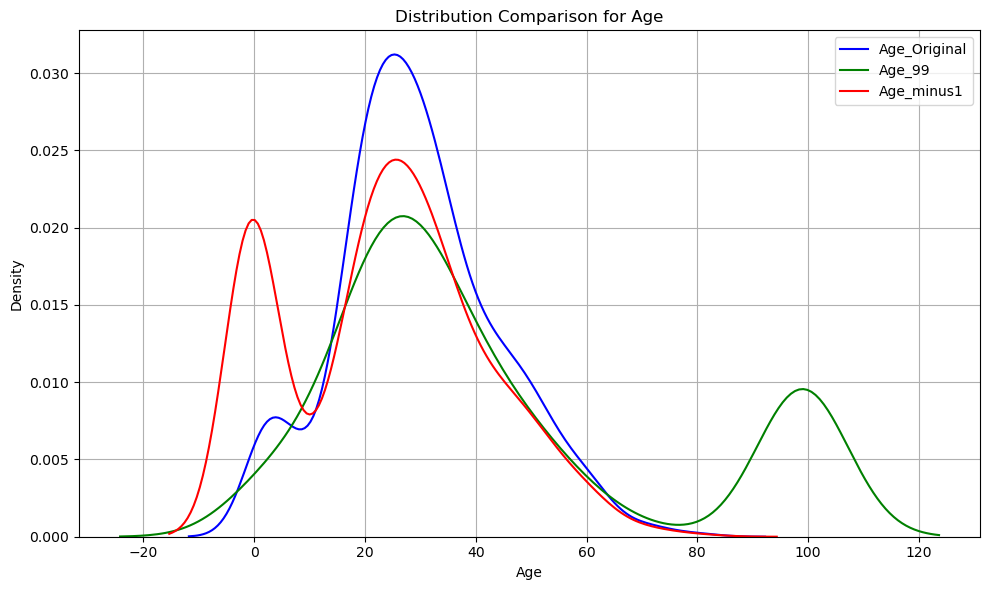

In [15]:
visualize('Age')

* Age ka distribution is changed.

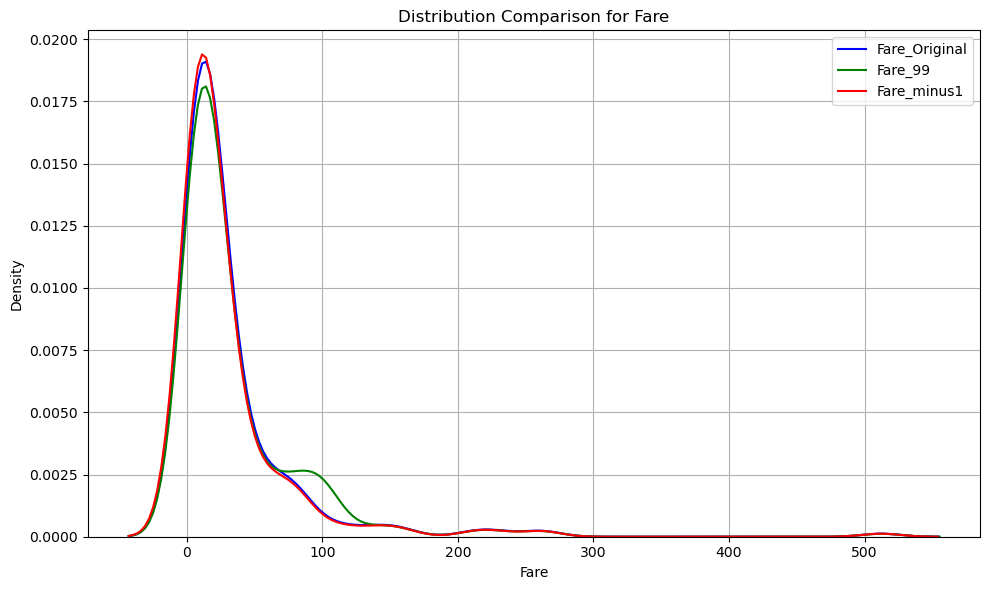

In [16]:
visualize('Fare')

* Fare ka distrribution is almost same.

#### Check the Covariance and Correlation

In [17]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,75.273024,69.137162
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,17.603852,17.684447
Age_99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-116.528480,-101.137070
Age_minus1,210.251707,135.785804,-5.034556,-166.460682,315.995504,138.114503,124.270305
Fare_99,75.273024,2761.031435,17.603852,-116.528480,138.114503,2833.708691,2514.109946
Fare_minus1,69.137162,2761.031435,17.684447,-101.137070,124.270305,2514.109946,2675.239405


In [18]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.091016,0.085422
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,0.196548,0.203212
Age_99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.071667,-0.064017
Age_minus1,1.000000,0.145071,-0.168329,-0.306576,1.000000,0.145956,0.135159
Fare_99,0.091016,1.000000,0.196548,-0.071667,0.145956,1.000000,0.913115
Fare_minus1,0.085422,1.000000,0.203212,-0.064017,0.135159,0.913115,1.000000


* Changes in Covariance and Correlation are also not good.

#### Check for outliers (Box Plot)

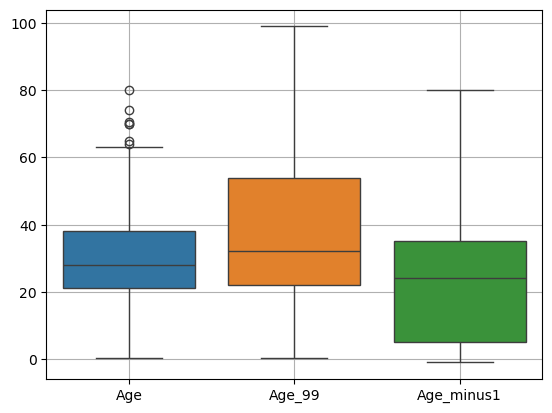

In [19]:
sns.boxplot(X_train[['Age', 'Age_99', 'Age_minus1']]);
plt.grid(True);

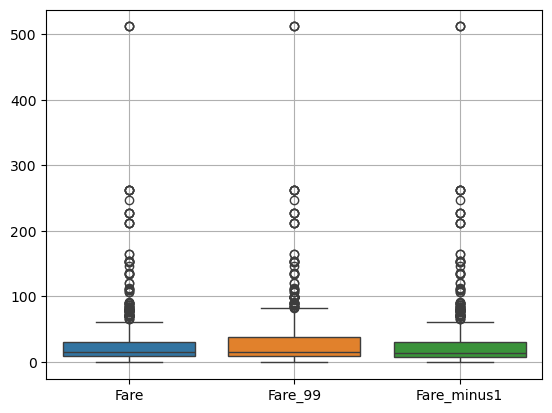

In [20]:
sns.boxplot(X_train[['Fare', 'Fare_99', 'Fare_minus1']]);
plt.grid(True);

* By using arbitrary imputation, the IQR has shrunk, which implies, the values which were not outliers before are now outliers.

#### Conclusion

Arbitrary imputation is suitable for imputing missing values in the Age variable, as they preserve the original distribution and have minimal impact on key statistical properties such as variance, covariance, and correlation with other features.

However, applying arbitrary imputation to the Fare variable is not recommended. Both methods noticeably alter the distribution of Fare, introducing bias and reducing variance. This distortion also affects Fare's covariance with other variables and weakens its correlation structure, potentially impacting the performance and interpretability of downstream models.

### Using Scikit-Learn

#### Train Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 3), (179, 3), (712,), (179,))

#### Simple Imputer

In [23]:
imputer_99 = SimpleImputer(strategy='constant', fill_value=99)
imputer_999 = SimpleImputer(strategy='constant', fill_value=999)

In [24]:
transformer = ColumnTransformer(
    transformers=[
        ('Imputer_99', imputer_99, ['Age']),
        ('Imputer_999', imputer_999, ['Fare'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=True,
    verbose=True
)

In [25]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

[ColumnTransformer] .... (1 of 3) Processing Imputer_99, total=   0.0s
[ColumnTransformer] ... (2 of 3) Processing Imputer_999, total=   0.0s
[ColumnTransformer] ..... (3 of 3) Processing remainder, total=   0.0s


In [26]:
transformer.named_transformers_['Imputer_99'].statistics_

array([99.])

In [27]:
transformer.named_transformers_['Imputer_999'].statistics_

array([999.])

In [28]:
X_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    , 999.    ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])